In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('brain-proteomics.csv')

In [3]:
df

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,TCGA-TM-A7C5,30,male,oligoastrocytoma,white,not hispanic or latino,no,G2,21,0.142862,...,-0.166682,-0.072997,0.089271,-0.124620,0.211999,0.037939,-0.022458,-0.335908,-0.126132,0.100600
302,TCGA-TM-A84R,46,male,oligodendroglioma,white,not hispanic or latino,no,G2,3,0.085319,...,-0.109752,0.017225,0.012680,-0.006096,0.011010,0.283044,0.126973,0.428842,0.538682,-0.028888
303,TCGA-TM-A84S,36,male,oligodendroglioma,white,not hispanic or latino,no,G3,11,0.083868,...,0.049349,-0.116631,-0.039064,0.219021,0.149160,0.145902,-0.110977,-0.049480,0.140910,-0.035152
304,TCGA-VV-A829,44,male,oligoastrocytoma,white,not hispanic or latino,yes,G3,27,0.131174,...,0.231609,0.034421,0.310362,0.435813,-0.138360,-0.148706,0.177230,-0.749877,-0.229200,-0.122342


In [4]:
df.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy',
       ...
       'p27_p', 'p27_pT157_p', 'p27_pT198_p', 'p38_pT180_Y182_p', 'p53_p',
       'p62-LCK-ligand_p', 'p70S6K_p', 'p70S6K_pT389_p', 'p90RSK_p',
       'p90RSK_pT359_S363_p'],
      dtype='object', length=186)

In [5]:
proteins_only = df.drop(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status'], axis=1)

In [6]:
proteins_only.head(25)

,outcome,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,1,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,-0.053652,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,1,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,-0.221878,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,1,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,-0.330152,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,1,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,0.199141,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,1,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,-0.150824,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841
5,1,-0.164242,0.288152,-0.568893,0.196604,0.032706,0.880433,-0.185177,0.302033,0.130094,...,0.575411,-0.057478,0.104779,-0.176017,0.232399,-0.206089,-0.009251,-0.697763,-0.117246,0.098758
6,1,0.014242,0.034897,-0.015983,-0.180602,-0.288039,-0.444838,0.150228,-0.229935,0.163495,...,0.169789,-0.016051,-0.062115,0.266414,-0.047049,0.246003,-0.006525,0.665310,-0.235029,-0.078620
7,1,-0.123964,-0.280984,0.010403,0.633483,0.151880,0.750522,0.033599,0.102552,-0.201207,...,-0.105910,-0.044812,-0.014866,-0.133188,1.660156,0.051647,0.180951,0.366800,-0.227320,-0.150510
8,1,-0.213742,0.549888,-0.705579,0.214152,0.097821,0.093311,-0.343899,-0.112170,0.574128,...,0.034574,0.039365,-0.001730,-0.068746,0.342972,0.212891,-0.021137,-0.476975,-0.372209,0.119989
9,1,-0.067694,0.487112,-0.175001,0.090776,0.082860,-0.136477,-0.078032,0.023957,0.233491,...,0.120371,0.000000,0.064999,0.117949,0.175863,0.096781,-0.062135,-0.313970,-0.396963,0.345387


In [7]:
proteins_only.outcome.value_counts()

outcome
1    184
0    122
Name: count, dtype: int64

In [8]:
len(df[df['outcome'] == 1])

184

In [9]:
len(df[df['outcome'] == 0])

122

In [10]:
X = proteins_only.drop('outcome', axis=1)

In [11]:
y = proteins_only['outcome']

In [12]:
X.shape, y.shape

((306, 174), (306,))

In [13]:
protein_features = X.columns

In [14]:
X

,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,ACC1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,-0.053652,-0.145543,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,-0.221878,-0.849298,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,-0.330152,-0.130743,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,0.199141,0.419897,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,-0.150824,-0.010213,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.034004,-0.073706,-0.233343,0.182469,-0.116130,-0.224590,-0.025644,0.010427,0.088982,0.327068,...,-0.166682,-0.072997,0.089271,-0.124620,0.211999,0.037939,-0.022458,-0.335908,-0.126132,0.100600
302,0.041951,0.265987,0.366885,-0.088258,0.191067,-0.273193,0.142699,-0.009984,0.032283,-0.039167,...,-0.109752,0.017225,0.012680,-0.006096,0.011010,0.283044,0.126973,0.428842,0.538682,-0.028888
303,-0.041528,0.049627,0.025368,0.001091,-0.157600,-0.298388,-0.146447,0.052560,0.012256,-0.027617,...,0.049349,-0.116631,-0.039064,0.219021,0.149160,0.145902,-0.110977,-0.049480,0.140910,-0.035152
304,-0.029236,-0.030125,-0.085980,0.487722,0.207991,0.089299,0.252555,0.688223,-0.024085,0.410816,...,0.231609,0.034421,0.310362,0.435813,-0.138360,-0.148706,0.177230,-0.749877,-0.229200,-0.122342


In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = pd.DataFrame(scaler.transform(X), columns=protein_features)
# X

<Axes: >

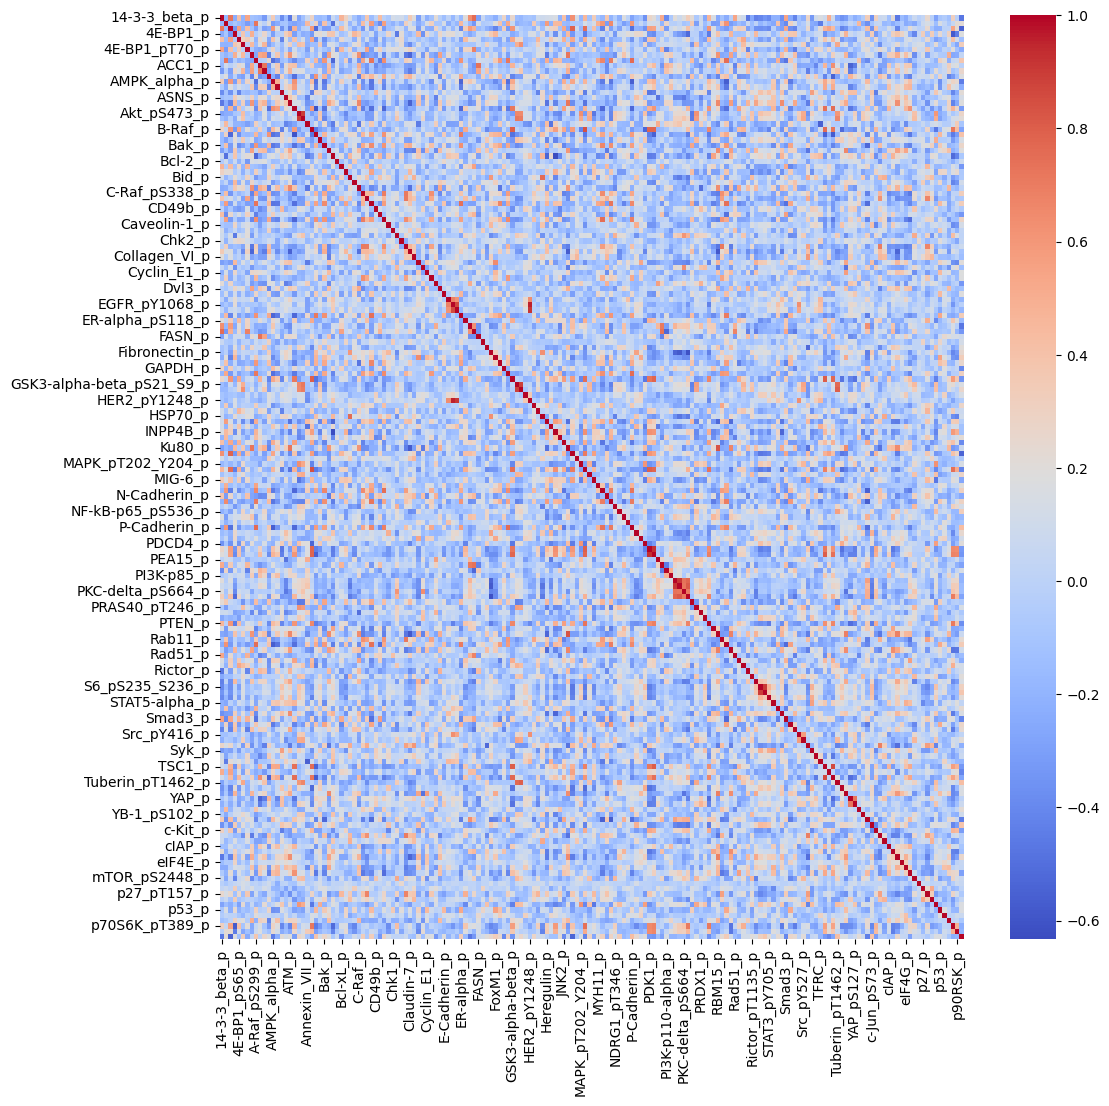

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

### Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [18]:
pca.components_

array([[ 4.61498022e-02,  9.88942167e-03,  1.32138987e-01, ...,
         3.73905215e-01,  6.86857856e-02, -3.37344880e-02],
       [ 1.22684018e-02,  2.61000328e-02,  2.76419577e-02, ...,
         4.02840181e-03, -7.59206094e-03, -8.47939586e-03],
       [ 4.60554344e-02,  1.11511410e-02,  5.80684573e-02, ...,
        -2.58052584e-02,  6.59171292e-03, -2.98506958e-02],
       ...,
       [ 9.61801804e-02, -9.40987864e-03, -4.13417065e-02, ...,
        -8.65072683e-04,  3.07033997e-02,  8.45047438e-02],
       [-5.58530653e-03,  8.81077524e-02,  1.94930222e-02, ...,
         3.23263770e-04,  4.50013379e-02, -9.71208281e-02],
       [-1.98535698e-01,  1.00063351e-01,  8.59546881e-02, ...,
         5.99598806e-03, -5.45520128e-02, -5.22352496e-03]])

In [19]:
# Access our 174 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=protein_features,
                 columns=[f'PC{i}' for i in range(1, 175)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174
14-3-3_beta_p,0.046150,0.012268,0.046055,0.012402,0.107919,0.000469,-0.036481,-0.007751,-0.018808,-0.022336,...,0.028724,-0.117640,0.146600,-0.137108,-0.017410,-0.099539,-0.301193,0.096180,-0.005585,-0.198536
14-3-3_epsilon_p,0.009889,0.026100,0.011151,-0.094296,-0.060592,0.016530,-0.031788,-0.019668,0.048096,0.036474,...,-0.127157,-0.021889,0.038385,-0.119784,-0.081297,-0.088998,0.038352,-0.009410,0.088108,0.100063
14-3-3_zeta_p,0.132139,0.027642,0.058068,0.081878,0.140064,-0.038723,-0.016956,-0.011695,0.068926,-0.090782,...,0.032168,0.023807,-0.092819,-0.007680,-0.071383,0.061477,-0.001703,-0.041342,0.019493,0.085955
4E-BP1_p,-0.074172,0.042246,-0.032437,0.014212,0.005594,0.026195,-0.094331,0.047499,-0.036289,0.020665,...,-0.094426,0.077288,0.075093,0.007516,-0.020324,0.011719,-0.001030,0.008700,-0.034392,-0.075382
4E-BP1_pS65_p,0.058594,0.031968,-0.017529,0.064275,0.033734,-0.076909,-0.055324,0.047309,-0.046233,-0.009457,...,-0.149657,-0.056662,-0.012362,0.024878,-0.007774,0.007495,0.058126,-0.025089,0.009831,-0.033880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p62-LCK-ligand_p,0.000374,0.036472,0.006014,0.015919,-0.044332,0.022034,0.001954,-0.164624,-0.062697,0.020074,...,-0.037813,0.029216,0.015098,-0.082543,0.007683,-0.028314,0.054701,-0.004404,-0.011087,-0.018348
p70S6K_p,0.003866,0.025166,-0.064977,0.036491,0.012181,0.019368,-0.030505,0.006133,0.042950,-0.016020,...,-0.043662,-0.034119,-0.007107,0.037099,-0.009238,-0.010771,-0.079310,-0.066070,-0.050043,0.096358
p70S6K_pT389_p,0.373905,0.004028,-0.025805,0.006076,-0.060132,-0.197073,0.042072,-0.162643,0.014283,-0.123112,...,0.006221,0.005136,-0.006281,0.007207,0.005725,-0.012103,-0.011754,-0.000865,0.000323,0.005996
p90RSK_p,0.068686,-0.007592,0.006592,-0.006403,-0.060726,-0.002910,0.057627,-0.018551,0.071392,0.058191,...,-0.024884,-0.033897,0.026460,0.026451,0.070592,0.035986,0.009641,0.030703,0.045001,-0.054552


#### X_proj with 174 PCs

In [20]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 175)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,0.011054,-0.015683,-0.000439,0.029527,0.013009,-0.000232,0.000091,-0.004067,0.017530,-0.008989
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,0.018090,0.024685,-0.015392,0.006413,0.033081,-0.021903,-0.003065,0.001004,-0.003564,-0.009607
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.015871,-0.052130,-0.014795,-0.014029,0.038977,0.038899,0.033109,-0.008654,-0.010548,-0.013907
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,-0.013753,0.061424,0.042227,-0.032087,-0.009426,-0.003768,-0.007957,0.002285,0.026115,-0.016882
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,0.008487,0.037767,0.008303,-0.001537,0.024210,-0.042467,0.015344,0.022898,0.008693,-0.035391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-1.023643,1.046101,-0.101173,-0.785923,-0.134688,1.207031,0.047496,-0.384865,-0.697140,-0.164663,...,0.021541,0.019309,-0.045610,0.004822,-0.018985,0.000321,0.047257,-0.011558,-0.012571,0.013678
302,1.374446,0.398357,0.131431,-0.184072,-0.223884,-0.219613,-0.195024,-0.165441,0.775726,-0.403130,...,0.010693,-0.023018,0.013015,0.020080,-0.055719,0.030523,0.018416,-0.036200,-0.017035,0.022213
303,0.581331,-0.649048,0.356141,-0.419840,-0.401187,1.006670,0.706732,0.333377,-0.568424,-0.081768,...,-0.017605,-0.010462,0.019957,0.020362,0.029756,-0.008495,0.006958,0.018113,0.003217,-0.015066
304,-1.916480,1.048129,-1.176163,0.358926,0.429226,-0.161593,-0.369217,0.083926,-0.269456,1.696231,...,-0.003776,0.003009,-0.014839,0.041305,0.003789,0.020895,-0.018920,0.013947,-0.014339,0.020571


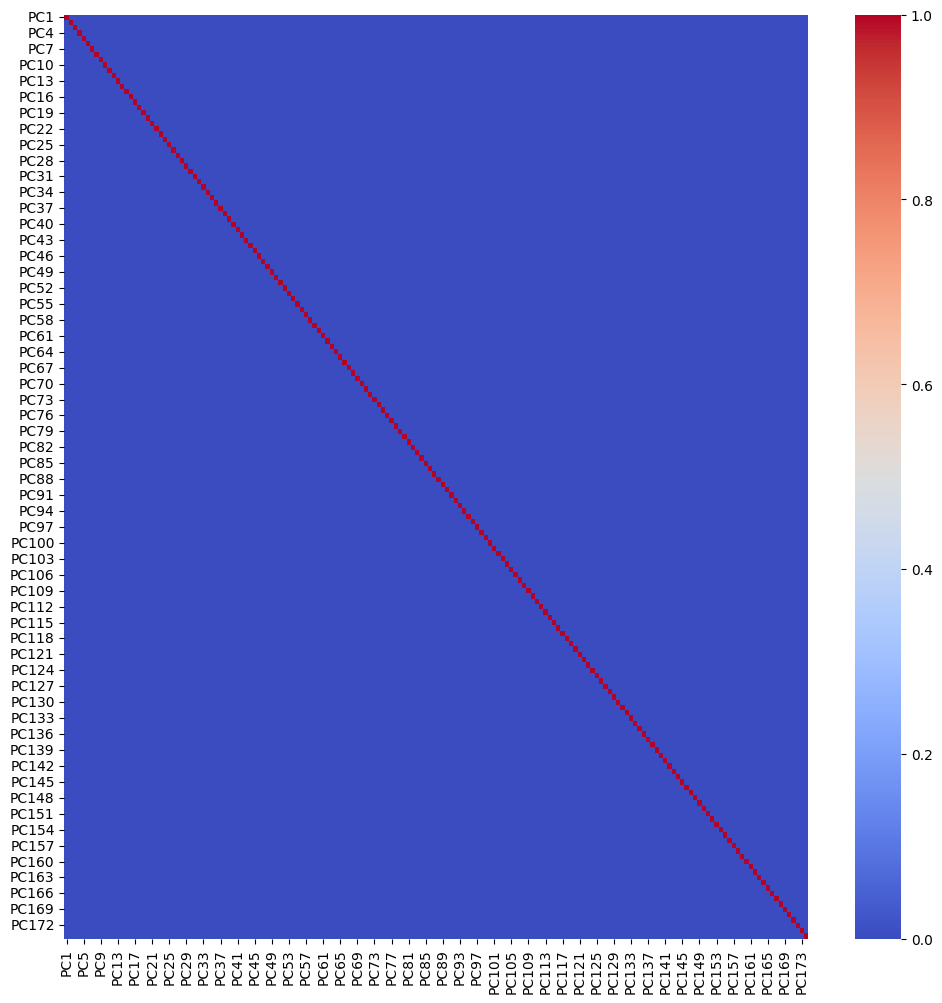

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(X_proj.corr(), cmap='coolwarm');

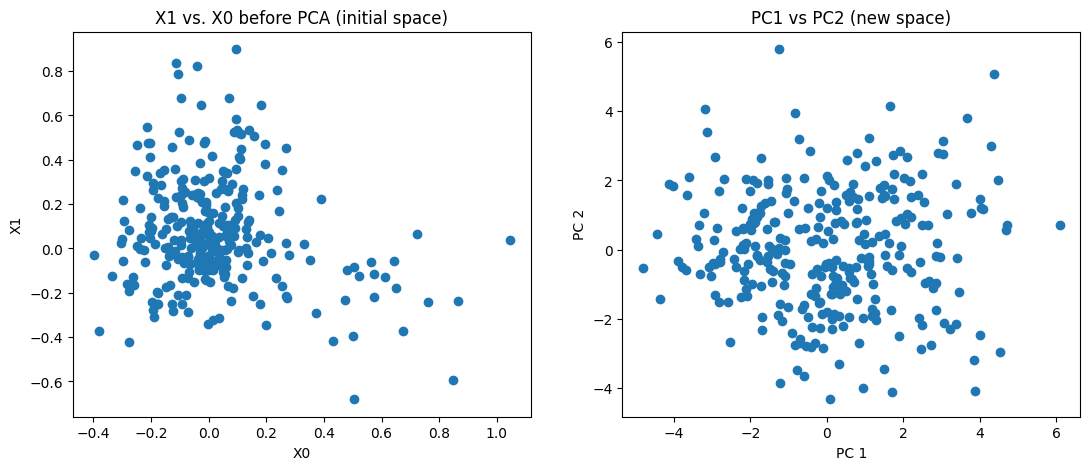

In [22]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

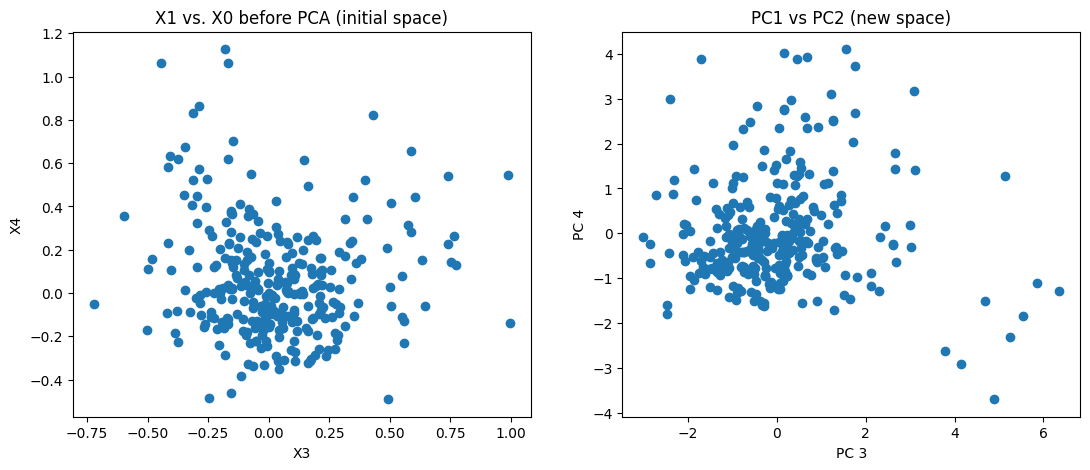

In [23]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X3'); plt.ylabel('X4')
plt.scatter(X.iloc[:,3], X.iloc[:,4])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 3'); plt.ylabel('PC 4')
plt.scatter(X_proj.iloc[:,3], X_proj.iloc[:,4]);

In [24]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", X.shape)

Shape of W:  (174, 174)
Shape of X (306, 174)


In [25]:
np.allclose(
    pca.transform(X),
    np.dot(X,W)
)

False

In [26]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [27]:
# Show all 174 principal components (unranked)
W = pd.DataFrame(eig_vecs, 
                 index=protein_features,
                 columns=[f'PC{i}' for i in range(1, 175)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174
14-3-3_beta_p,0.045702,-0.010007,-0.048459,0.014929,0.107651,-0.000977,0.034662,-0.006769,0.016387,0.021396,...,0.153832,0.028850,0.084040,-0.038357,-0.031391,-0.078027,-0.015952,-0.021008,-0.018465,0.005841
14-3-3_epsilon_p,0.009350,-0.025352,0.024503,0.078447,-0.057752,-0.011830,0.051778,-0.022077,-0.034000,-0.027348,...,0.018883,0.034932,-0.061697,0.096962,0.008367,0.045448,0.086170,-0.099730,-0.088743,0.052534
14-3-3_zeta_p,0.130815,-0.021572,-0.105167,-0.037464,0.139645,0.037934,0.017272,-0.011476,-0.063555,0.097546,...,0.020581,-0.051923,0.006015,-0.013804,0.004758,-0.018140,0.037791,-0.118079,-0.009781,0.035785
4E-BP1_p,-0.074356,-0.041790,0.010430,-0.032373,0.006531,-0.024215,0.098046,0.048658,0.036028,-0.019665,...,0.026578,-0.207280,0.016565,0.024411,-0.057099,0.061381,-0.004029,0.071216,0.005021,-0.059317
4E-BP1_pS65_p,0.057750,-0.028567,-0.034339,-0.066286,0.034589,0.078129,0.059216,0.047276,0.049384,0.013058,...,0.002839,-0.000855,0.001553,-0.028493,0.066522,-0.033059,0.067254,0.001838,0.009031,0.077583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p62-LCK-ligand_p,0.000198,-0.035400,-0.017591,-0.010580,-0.044243,-0.021349,0.005115,-0.165481,0.062475,-0.018364,...,0.024788,-0.048024,0.021242,0.028039,0.002473,0.063851,-0.035334,-0.016078,0.077588,-0.015825
p70S6K_p,0.004307,-0.026503,0.034860,-0.066276,0.012032,-0.019511,0.027062,0.007551,-0.044959,0.016340,...,0.031797,0.051897,0.168714,-0.130411,-0.075783,0.011629,-0.039941,-0.036283,-0.020636,0.023995
p70S6K_pT389_p,0.372594,0.000555,-0.008608,-0.026987,-0.057015,0.200897,-0.020100,-0.166816,-0.000006,0.126753,...,-0.008886,0.013410,0.008223,-0.024324,-0.007229,0.034663,-0.031813,-0.006034,-0.004711,-0.025137
p90RSK_p,0.068738,0.007528,0.000075,0.009620,-0.060985,0.002473,-0.057745,-0.019426,-0.068485,-0.055633,...,0.010291,-0.044851,0.032451,-0.050711,-0.048759,-0.079515,-0.010016,-0.047552,0.067145,-0.068442


In [28]:
# Let's compute it
X_proj.std()**2 / ((X.std()**2).sum())

PC1      0.167464
PC2      0.119151
PC3      0.087120
PC4      0.083760
PC5      0.057895
           ...   
PC170    0.000022
PC171    0.000022
PC172    0.000020
PC173    0.000019
PC174    0.000014
Length: 174, dtype: float64

In [29]:
PCs_variance = pd.DataFrame(X_proj.std()**2 / ((X.std()**2).sum()))
PCs_variance

,0
PC1,0.167464
PC2,0.119151
PC3,0.087120
PC4,0.083760
PC5,0.057895
...,...
PC170,0.000022
PC171,0.000022
PC172,0.000020
PC173,0.000019


In [30]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([1.67464020e-01, 1.19150765e-01, 8.71195894e-02, 8.37597406e-02,
       5.78949920e-02, 5.02834953e-02, 3.71357228e-02, 3.28249059e-02,
       2.78024303e-02, 2.30790432e-02, 2.10520078e-02, 1.74399296e-02,
       1.50069986e-02, 1.34666050e-02, 1.27179728e-02, 1.11416446e-02,
       1.08329646e-02, 1.00821453e-02, 9.32153393e-03, 8.97389140e-03,
       8.68959599e-03, 7.65273957e-03, 7.40500081e-03, 6.67755132e-03,
       6.27961538e-03, 6.11590970e-03, 5.48214654e-03, 5.32443057e-03,
       5.01975414e-03, 4.84960913e-03, 4.71534628e-03, 4.53134205e-03,
       4.31903225e-03, 4.04021955e-03, 3.83578769e-03, 3.59388134e-03,
       3.42996143e-03, 3.30195608e-03, 3.14046129e-03, 3.02033350e-03,
       2.99532364e-03, 2.78885582e-03, 2.75406454e-03, 2.64129484e-03,
       2.57217430e-03, 2.47895602e-03, 2.42894435e-03, 2.18938650e-03,
       2.12132655e-03, 2.05389656e-03, 1.95042553e-03, 1.93402101e-03,
       1.86020872e-03, 1.69570102e-03, 1.65426911e-03, 1.64179592e-03,
      

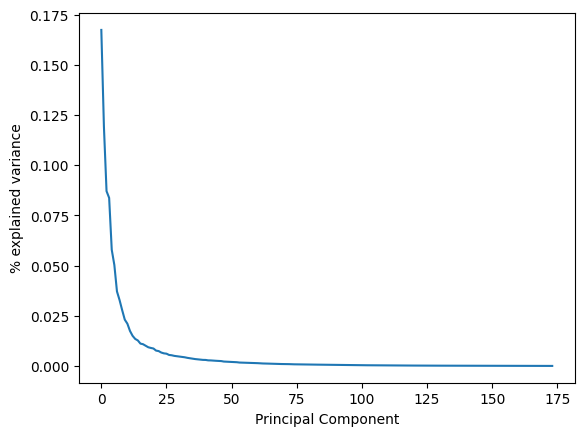

In [31]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

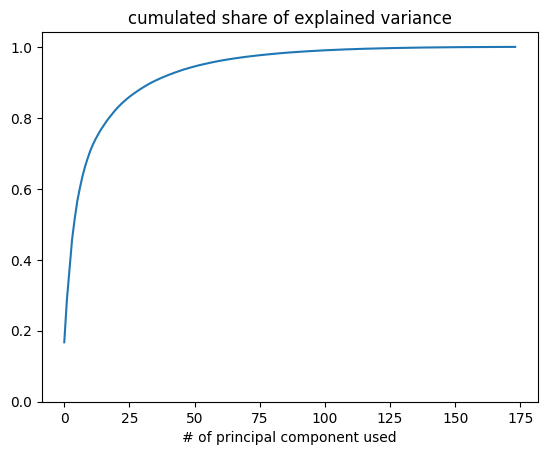

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

#### X_proj25 with 25 PCs

In [33]:
# Fit a PCA with 25 components
pca25 = PCA(n_components=25).fit(X)

# Project your data into 25 dimensions
X_proj25 = pd.DataFrame(pca25.fit_transform(X), columns=[f'PC{i}' for i in range(1, 26)])

# We have "compressed" our dataset in 25D
X_proj25

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,-0.788273,0.459381,0.850981,0.434288,-1.435092,0.698857,0.779851,1.231742,0.926107,0.613176
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,1.966932,-1.059868,0.968638,-0.917200,-0.697738,-0.602331,-0.050573,0.536168,-0.288796,-0.702701
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.674046,-1.193134,0.328703,-0.774780,-0.865291,0.211862,-0.336876,0.775520,-0.118784,0.191753
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,-0.627019,0.174462,0.621383,0.232708,0.007918,-0.193062,-0.391400,0.748753,0.402672,0.227947
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,-1.027855,-0.543057,-0.116958,0.475976,0.756740,1.002887,-0.247552,0.165241,-0.023651,0.525050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-1.023643,1.046101,-0.101173,-0.785923,-0.134688,1.207031,0.047496,-0.384865,-0.697140,-0.164663,...,0.168624,-0.455053,0.056692,0.323046,-0.408889,0.001808,0.479383,-0.062122,0.218660,0.017346
302,1.374446,0.398357,0.131431,-0.184072,-0.223884,-0.219613,-0.195024,-0.165441,0.775726,-0.403130,...,0.246609,0.086555,-0.072894,0.307577,0.404030,-0.364117,-0.046565,-0.203888,-0.317519,-0.165886
303,0.581331,-0.649048,0.356141,-0.419840,-0.401187,1.006670,0.706732,0.333377,-0.568424,-0.081768,...,0.378398,-0.252651,0.071444,0.056689,0.273738,-0.099735,-0.046330,0.015406,0.159684,0.210854
304,-1.916480,1.048129,-1.176163,0.358926,0.429226,-0.161593,-0.369217,0.083926,-0.269456,1.696231,...,0.398656,-0.880350,0.583635,-0.392450,-0.237072,0.428889,-0.226998,-0.409462,0.119878,1.117302


In [34]:
PCs_variance.head(25)

,0
PC1,0.167464
PC2,0.119151
PC3,0.087120
PC4,0.083760
PC5,0.057895
PC6,0.050283
PC7,0.037136
PC8,0.032825
PC9,0.027802
PC10,0.023079


#### X_proj50 with 50 PCs

In [35]:
# Fit a PCA with 50 components
pca50 = PCA(n_components=50).fit(X)

# Project your data into 25 dimensions
X_proj50 = pd.DataFrame(pca50.fit_transform(X), columns=[f'PC{i}' for i in range(1, 51)])

# We have "compressed" our dataset in 25D
X_proj50

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,0.130778,0.845886,-0.234281,-0.168909,0.579142,-0.620028,0.312887,-0.330825,-0.024248,-0.018694
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,0.017652,-0.146556,-0.731209,0.279720,0.106724,-0.200566,-0.386979,-0.515392,-0.612109,0.007124
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.105678,0.045125,-0.345652,-0.092867,-0.493231,0.363704,0.007826,0.002403,-0.216780,-0.283223
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,0.242822,-0.055374,-0.083520,0.197036,0.494089,0.323034,-0.253118,0.469626,-0.176339,0.196263
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,0.307917,0.320172,0.349613,0.197554,-0.169901,-0.101252,-0.331284,0.121860,0.007081,-0.464287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-1.023643,1.046101,-0.101173,-0.785923,-0.134688,1.207031,0.047496,-0.384865,-0.697140,-0.164663,...,0.330845,0.110115,0.045278,0.007949,-0.034903,0.124326,0.014740,0.228191,0.030668,0.153090
302,1.374446,0.398357,0.131431,-0.184072,-0.223884,-0.219613,-0.195024,-0.165441,0.775726,-0.403130,...,-0.101709,-0.158967,-0.149512,-0.064259,0.049535,0.080936,0.204001,-0.147926,-0.194283,-0.024269
303,0.581331,-0.649048,0.356141,-0.419840,-0.401187,1.006670,0.706732,0.333377,-0.568424,-0.081768,...,-0.133558,0.087151,-0.052196,-0.007583,-0.090545,-0.026371,0.129317,0.032441,-0.031370,0.192333
304,-1.916480,1.048129,-1.176163,0.358926,0.429226,-0.161593,-0.369217,0.083926,-0.269456,1.696231,...,0.161002,-0.302102,-0.233411,-0.562996,0.302138,0.151359,0.351036,0.366946,-0.356985,-0.397235


In [36]:
PCs_variance.head(50)

,0
PC1,0.167464
PC2,0.119151
PC3,0.087120
PC4,0.083760
PC5,0.057895
PC6,0.050283
PC7,0.037136
PC8,0.032825
PC9,0.027802
PC10,0.023079


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print("accuracy 25 PCs")
print(cross_val_score(LogisticRegression(), X_proj25, y, cv=5).mean())

print("\naccuracy 50 PCs")
print(cross_val_score(LogisticRegression(), X_proj50, y, cv=5).mean())

print("\naccuracy all 175 PCs")
print(cross_val_score(LogisticRegression(), X_proj, y, cv=5).mean())

print("\naccuracy all 175 initial features")
print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())

accuracy 25 PCs
0.719249074563723

accuracy 50 PCs
0.6995769434161818

accuracy all 175 PCs
0.7225806451612904

accuracy all 175 initial features
0.7193019566367


#### working with 25 PCs

In [38]:
X_reconstructed = pca25.inverse_transform(X_proj25)
X_reconstructed.shape

(306, 174)

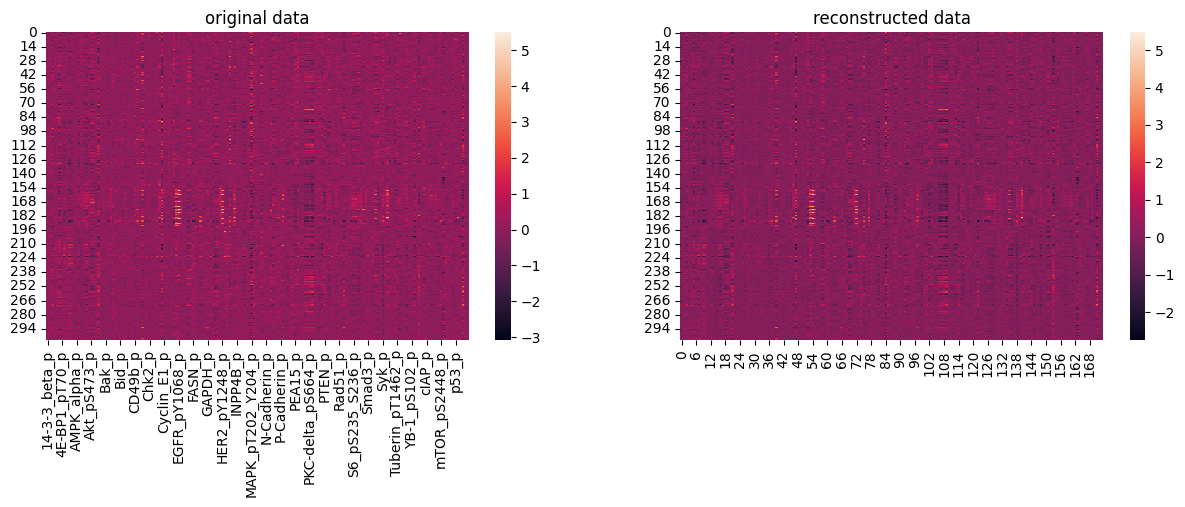

In [39]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(X)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

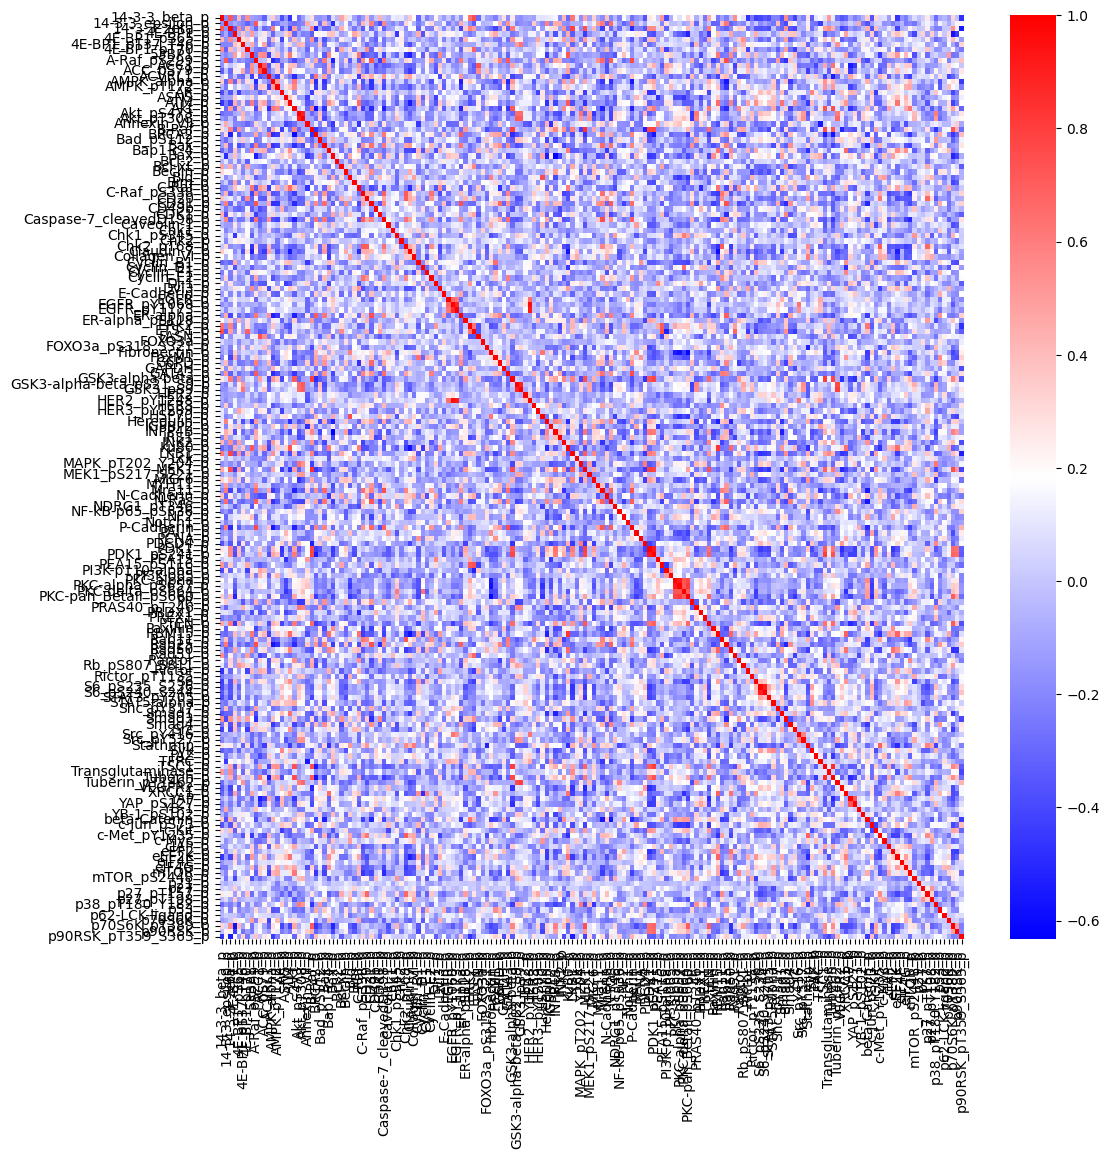

In [40]:
# Heatmap of pairwise correlations
correlation_matrix = X.corr()
column_names = correlation_matrix.columns

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [41]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [42]:
corr_df

,feature_1,feature_2,correlation
1,14-3-3_beta_p,14-3-3_epsilon_p,-0.181349
2,14-3-3_beta_p,14-3-3_zeta_p,0.725094
3,14-3-3_beta_p,4E-BP1_p,-0.235600
4,14-3-3_beta_p,4E-BP1_pS65_p,0.408718
5,14-3-3_beta_p,4E-BP1_pT37_T46_p,-0.200789
...,...,...,...
30270,p90RSK_pT359_S363_p,p53_p,0.169075
30271,p90RSK_pT359_S363_p,p62-LCK-ligand_p,0.069426
30272,p90RSK_pT359_S363_p,p70S6K_p,-0.083126
30273,p90RSK_pT359_S363_p,p70S6K_pT389_p,-0.228830


In [43]:
# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
9468,EGFR_pY1068_p,HER2_pY1248_p,0.955629,0.955629
12582,HER2_pY1248_p,EGFR_pY1068_p,0.955629,0.955629
17674,PDK1_pS241_p,PDK1_p,0.924829,0.924829
17501,PDK1_p,PDK1_pS241_p,0.924829,0.924829
9642,EGFR_pY1173_p,HER2_pY1248_p,0.915553,0.915553
12583,HER2_pY1248_p,EGFR_pY1173_p,0.915553,0.915553
18551,PKC-alpha_p,PKC-alpha_pS657_p,0.915267,0.915267
18724,PKC-alpha_pS657_p,PKC-alpha_p,0.915267,0.915267
3151,Akt_pS473_p,Akt_pT308_p,0.898324,0.898324
3324,Akt_pT308_p,Akt_pS473_p,0.898324,0.898324


In [44]:
#### Cross validate on X 


from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LogisticRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X, y , cv=5))

0.7193019566367

In [45]:
#### Cross validate on X_proj


from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LogisticRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X_proj, y , cv=5))

0.7225806451612904

In [46]:
#### Cross validate on X_proj50


from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LogisticRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X_proj50, y , cv=5))

0.6995769434161818

In [47]:
#### Cross validate on X_proj25


from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LogisticRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X_proj25, y , cv=5))

0.719249074563723

### Feature Permutation

In [48]:
from sklearn.inspection import permutation_importance

# Fit model
log_model = LogisticRegression().fit(X, y) 

# Performs Permutation
permutation_score = permutation_importance(log_model, X, y, n_repeats=50) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
171,p70S6K_pT389_p,0.061634
69,GSK3-alpha-beta_pS21_S9_p,0.059216
16,ATM_p,0.046797
5,4E-BP1_pT37_T46_p,0.037843
84,MAPK_pT202_Y204_p,0.037582
...,...,...
30,Bid_p,-0.00085
48,Cyclin_E1_p,-0.001373
94,NF2_p,-0.001373
45,Collagen_VI_p,-0.002222


### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: outcome, Length: 306, dtype: int64

#### Logistic Regression on X (174 proteins)

In [51]:
X.head()

,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,ACC1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,-0.053652,-0.145543,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,-0.221878,-0.849298,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,-0.330152,-0.130743,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,0.199141,0.419897,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,-0.150824,-0.010213,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [52]:
log_reg_model = LogisticRegression(max_iter=1000)

cv_results_log_reg_X = cross_validate(log_reg_model, X, y, cv=5, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1']
                           )
pd.DataFrame(cv_results_log_reg_X)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.076295,0.019359,0.612903,0.972973,0.610169,0.750000
1,0.011356,0.019150,0.655738,0.783784,0.690476,0.734177
2,0.012357,0.013983,0.934426,0.918919,0.971429,0.944444
3,0.014629,0.013089,0.803279,0.864865,0.820513,0.842105
4,0.018853,0.012870,0.590164,0.388889,0.823529,0.528302


In [53]:
accuracy_X = cv_results_log_reg_X['test_accuracy'].mean()
recall_X = cv_results_log_reg_X['test_recall'].mean()
precision_X = cv_results_log_reg_X['test_precision'].mean()
f1_score_X = cv_results_log_reg_X['test_f1'].mean()

In [54]:
accuracy_X, recall_X, precision_X, f1_score_X

(0.7193019566367, 0.7858858858858859, 0.7832232971415424, 0.7598057619169329)

#### Logistic Regression on X_proj (174 PCs)

In [55]:
X_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,0.011054,-0.015683,-0.000439,0.029527,0.013009,-0.000232,0.000091,-0.004067,0.017530,-0.008989
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,0.018090,0.024685,-0.015392,0.006413,0.033081,-0.021903,-0.003065,0.001004,-0.003564,-0.009607
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.015871,-0.052130,-0.014795,-0.014029,0.038977,0.038899,0.033109,-0.008654,-0.010548,-0.013907
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,-0.013753,0.061424,0.042227,-0.032087,-0.009426,-0.003768,-0.007957,0.002285,0.026115,-0.016882
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,0.008487,0.037767,0.008303,-0.001537,0.024210,-0.042467,0.015344,0.022898,0.008693,-0.035391


In [56]:
log_reg_model = LogisticRegression(max_iter=1000)

cv_results_log_reg_Xproj = cross_validate(log_reg_model, X_proj, y, cv=5, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1']
                           )
pd.DataFrame(cv_results_log_reg_Xproj)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.095305,0.021708,0.612903,0.972973,0.610169,0.750000
1,0.009900,0.016271,0.655738,0.783784,0.690476,0.734177
2,0.012635,0.012891,0.934426,0.918919,0.971429,0.944444
3,0.018403,0.014097,0.819672,0.891892,0.825000,0.857143
4,0.014983,0.013137,0.590164,0.388889,0.823529,0.528302


In [57]:
accuracy_Xproj = cv_results_log_reg_Xproj['test_accuracy'].mean()
recall_Xproj = cv_results_log_reg_Xproj['test_recall'].mean()
precision_Xproj = cv_results_log_reg_Xproj['test_precision'].mean()
precision_Xproj = cv_results_log_reg_Xproj['test_f1'].mean()

In [58]:
accuracy_Xproj, recall_Xproj, precision_Xproj, precision_Xproj

(0.7225806451612904,
 0.7912912912912913,
 0.7628132807139255,
 0.7628132807139255)

#### Logistic Regression on X_proj50 (50 PCs)

In [59]:
X_proj50.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,0.130778,0.845886,-0.234281,-0.168909,0.579142,-0.620028,0.312887,-0.330825,-0.024248,-0.018694
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,0.017652,-0.146556,-0.731209,0.279720,0.106724,-0.200566,-0.386979,-0.515392,-0.612109,0.007124
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.105678,0.045125,-0.345652,-0.092867,-0.493231,0.363704,0.007826,0.002403,-0.216780,-0.283223
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,0.242822,-0.055374,-0.083520,0.197036,0.494089,0.323034,-0.253118,0.469626,-0.176339,0.196263
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,0.307917,0.320172,0.349613,0.197554,-0.169901,-0.101252,-0.331284,0.121860,0.007081,-0.464287


In [60]:
log_reg_model = LogisticRegression(max_iter=1000)

cv_results_log_reg_Xproj50 = cross_validate(log_reg_model, X_proj50, y, cv=5, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1']
                           )
pd.DataFrame(cv_results_log_reg_Xproj50)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.007982,0.017686,0.629032,0.945946,0.625000,0.752688
1,0.035348,0.024319,0.606557,0.783784,0.644444,0.707317
2,0.011046,0.015342,0.934426,0.918919,0.971429,0.944444
3,0.009111,0.013089,0.754098,0.837838,0.775000,0.805195
4,0.010845,0.011691,0.573770,0.416667,0.750000,0.535714


In [61]:
accuracy_Xproj50 = cv_results_log_reg_Xproj50['test_accuracy'].mean()
recall_Xproj50 = cv_results_log_reg_Xproj50['test_recall'].mean()
precision_Xproj50 = cv_results_log_reg_Xproj50['test_precision'].mean()
precision_Xproj50 = cv_results_log_reg_Xproj50['test_f1'].mean()

In [62]:
accuracy_Xproj50, recall_Xproj50, precision_Xproj50, precision_Xproj50

(0.6995769434161818,
 0.7806306306306305,
 0.7490717561134556,
 0.7490717561134556)

#### Logistic Regression on X_proj25 (25 PCs)

In [63]:
X_proj25.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.232452,-3.860463,1.696996,-0.924086,-0.547087,-0.183429,0.424723,1.440261,1.855300,-0.703917,...,-0.788273,0.459381,0.850981,0.434288,-1.435092,0.698857,0.779851,1.231742,0.926107,0.613176
1,-0.167669,-1.501937,0.040633,0.544429,1.444480,-1.174043,1.248319,-1.712422,-0.552027,-0.150733,...,1.966932,-1.059868,0.968638,-0.917200,-0.697738,-0.602331,-0.050573,0.536168,-0.288796,-0.702701
2,-3.038012,-0.756231,-1.531283,1.276033,2.504281,-0.019005,-0.552433,-0.809968,0.525684,-1.151004,...,0.674046,-1.193134,0.328703,-0.774780,-0.865291,0.211862,-0.336876,0.775520,-0.118784,0.191753
3,3.658145,3.819991,0.824015,0.052456,-0.188812,-0.625066,0.327669,-1.198825,-0.163308,-0.360232,...,-0.627019,0.174462,0.621383,0.232708,0.007918,-0.193062,-0.391400,0.748753,0.402672,0.227947
4,-0.777801,-3.484494,0.238680,0.138954,1.095815,0.894067,1.545169,0.628937,-0.528107,0.353170,...,-1.027855,-0.543057,-0.116958,0.475976,0.756740,1.002887,-0.247552,0.165241,-0.023651,0.525050


In [64]:
log_reg_model = LogisticRegression(max_iter=1000)

cv_results_log_reg_Xproj25 = cross_validate(log_reg_model, X_proj25, y, cv=5, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1']
                           )
pd.DataFrame(cv_results_log_reg_Xproj25)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.008715,0.008448,0.629032,0.945946,0.625000,0.752688
1,0.005710,0.009415,0.672131,0.837838,0.688889,0.756098
2,0.004760,0.007271,0.901639,0.837838,1.000000,0.911765
3,0.004845,0.009403,0.836066,0.918919,0.829268,0.871795
4,0.005472,0.008205,0.557377,0.416667,0.714286,0.526316


In [65]:
accuracy_Xproj25 = cv_results_log_reg_Xproj25['test_accuracy'].mean()
recall_Xproj25 = cv_results_log_reg_Xproj25['test_recall'].mean()
precision_Xproj25 = cv_results_log_reg_Xproj25['test_precision'].mean()
f1_score_Xproj25 = cv_results_log_reg_Xproj25['test_f1'].mean()

In [66]:
accuracy_Xproj25, recall_Xproj25, precision_Xproj25, f1_score_Xproj25

(0.719249074563723, 0.7914414414414414, 0.771488579171506, 0.7637322200339058)

#### Logistic Regression on X with train test split

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [68]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
log_reg_model = LogisticRegression(max_iter=1000)

log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
y_pred_X = log_reg_model.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred_X, labels=log_reg_model.classes_)
cm

array([[26, 12],
       [ 9, 45]])

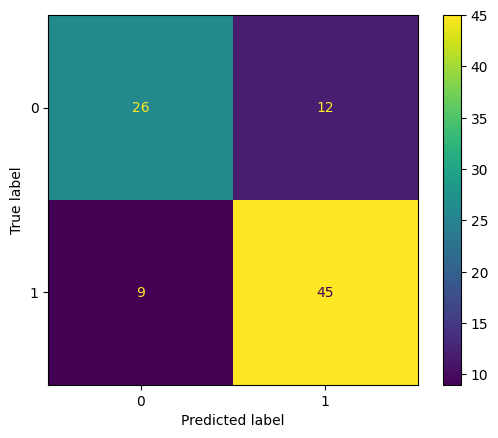

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model.classes_)
disp.plot();

In [76]:
class_rep_log_reg = classification_report(y_test, y_pred_X, labels=log_reg_model.classes_)
print(class_rep_log_reg)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.79      0.83      0.81        54

    accuracy                           0.77        92
   macro avg       0.77      0.76      0.76        92
weighted avg       0.77      0.77      0.77        92



In [77]:
proteins_only['proba_0_X'], proteins_only['proba_1_X'] = cross_val_predict(log_reg_model,
                                                                X,
                                                                y,
                                                                cv=5,
                                                                method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(y,
                                                      proteins_only['proba_1_X']) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.60130719 0.60327869 0.60197368 0.6039604  0.60596026]
recall- [1.         1.         0.99456522 0.99456522 0.99456522]
threshold- [0.00866048 0.01364995 0.01656258 0.01962894 0.01983429]


In [78]:
proba_scores_X = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe
proba_scores_X

,threshold,precision,recall
0,0.008660,0.601307,1.000000
1,0.013650,0.603279,1.000000
2,0.016563,0.601974,0.994565
3,0.019629,0.603960,0.994565
4,0.019834,0.605960,0.994565
...,...,...,...
301,0.998427,0.600000,0.016304
302,0.998955,0.750000,0.016304
303,0.999178,0.666667,0.010870
304,0.999346,0.500000,0.005435


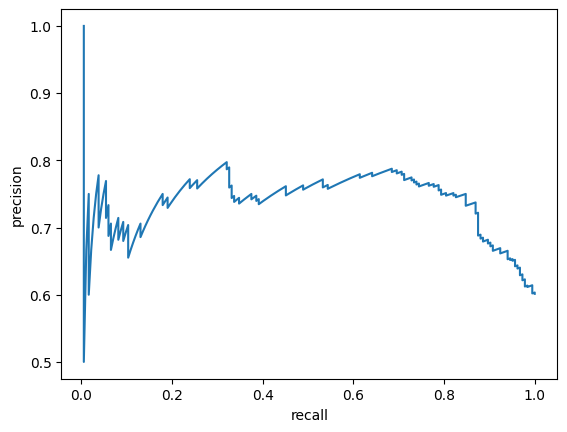

In [79]:
plt.plot(proba_scores_X['recall'],proba_scores_X['precision'])
plt.ylabel('precision')
plt.xlabel('recall');

#### Logistic Regression on X_proj with train test split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.3, random_state=42)

In [81]:
log_reg_model = LogisticRegression(max_iter=1000)

log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
y_pred_Xproj = log_reg_model.predict(X_test)

In [83]:
cm = confusion_matrix(y_test, y_pred_Xproj, labels=log_reg_model.classes_)
cm

array([[26, 12],
       [ 9, 45]])

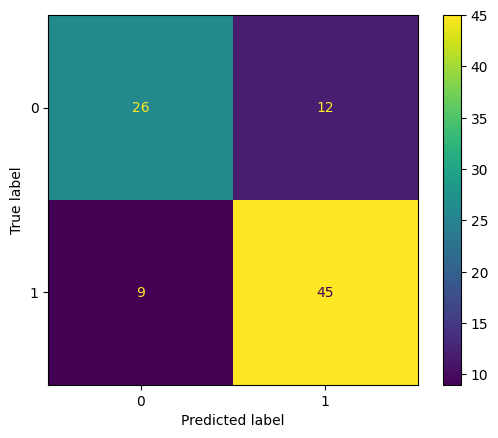

In [84]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model.classes_)
disp.plot();

In [85]:
class_rep_log_reg = classification_report(y_test, y_pred_Xproj, labels=log_reg_model.classes_)
print(class_rep_log_reg)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.79      0.83      0.81        54

    accuracy                           0.77        92
   macro avg       0.77      0.76      0.76        92
weighted avg       0.77      0.77      0.77        92



#### Logistic Regression on X_proj25 with train test split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_proj25, y, test_size=0.3, random_state=42)

In [87]:
log_reg_model = LogisticRegression(max_iter=1000)

log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred_Xproj25 = log_reg_model.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, y_pred_Xproj25, labels=log_reg_model.classes_)
cm

array([[27, 11],
       [11, 43]])

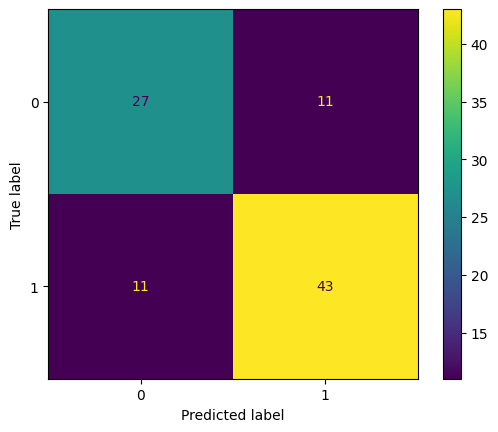

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model.classes_)
disp.plot();

In [91]:
class_rep_log_reg = classification_report(y_test, y_pred_Xproj25, labels=log_reg_model.classes_)
print(class_rep_log_reg)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        38
           1       0.80      0.80      0.80        54

    accuracy                           0.76        92
   macro avg       0.75      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



#### K Nearest Neighbor Classsifier on X with train test split

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
KNN_classifier = KNeighborsClassifier()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred_knn_X = KNN_classifier.predict(X_test)

In [97]:
cm_knn = confusion_matrix(y_test, y_pred_knn_X, labels=KNN_classifier.classes_)
cm_knn

array([[20, 18],
       [14, 40]])

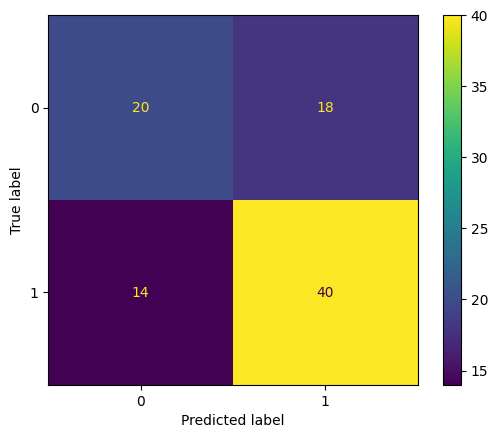

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=KNN_classifier.classes_)
disp.plot();

In [99]:
class_rep_knn = classification_report(y_test, y_pred_knn_X, labels=KNN_classifier.classes_)
print(class_rep_knn)

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        38
           1       0.69      0.74      0.71        54

    accuracy                           0.65        92
   macro avg       0.64      0.63      0.63        92
weighted avg       0.65      0.65      0.65        92



#### K Nearest Neighbor Classsifier on X_proj25 with train test split

In [100]:
KNN_classifier = KNeighborsClassifier()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_proj25, y, test_size=0.3, random_state=42)

In [102]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
y_pred_knn_X_proj25 = KNN_classifier.predict(X_test)

In [104]:
cm_knn = confusion_matrix(y_test, y_pred_knn_X_proj25, labels=KNN_classifier.classes_)
cm_knn

array([[21, 17],
       [14, 40]])

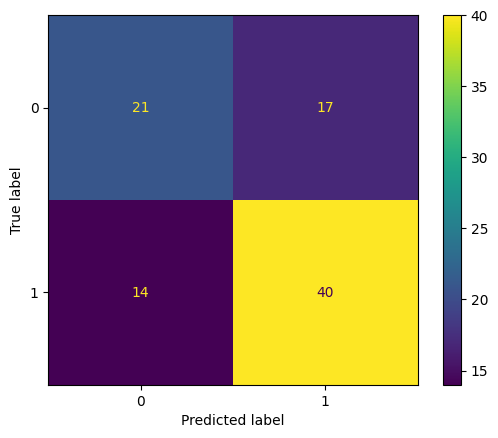

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=KNN_classifier.classes_)
disp.plot();

In [106]:
class_rep_knn = classification_report(y_test, y_pred_knn_X_proj25, labels=KNN_classifier.classes_)
print(class_rep_knn)

              precision    recall  f1-score   support

           0       0.60      0.55      0.58        38
           1       0.70      0.74      0.72        54

    accuracy                           0.66        92
   macro avg       0.65      0.65      0.65        92
weighted avg       0.66      0.66      0.66        92



#### Decision Tree Classifier on X (174 proteins) with train test split

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

# Train the classifier
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier()

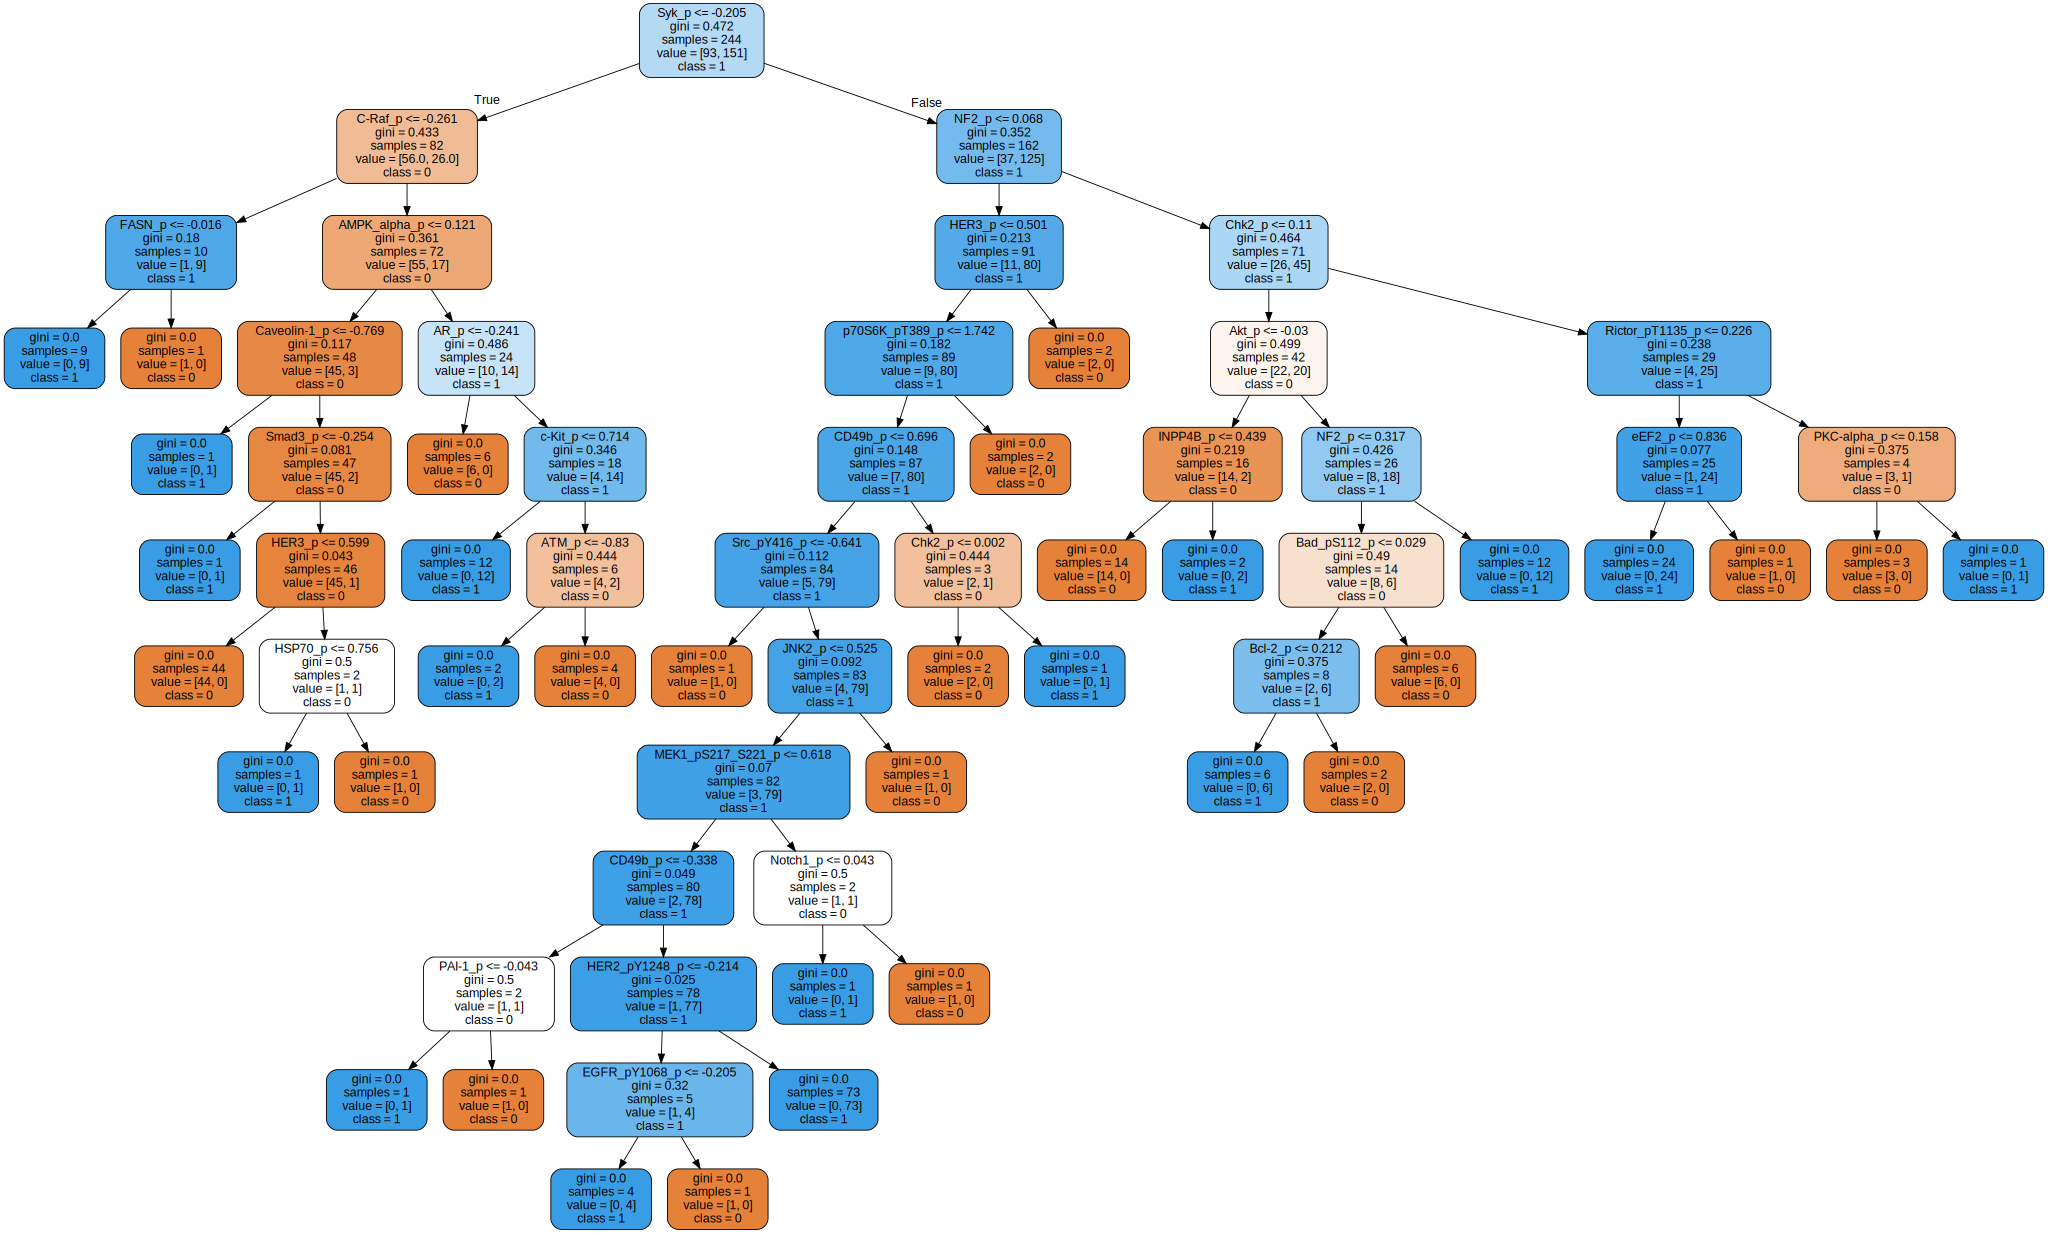

In [110]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="on_X_tree.dot", 
                feature_names=X.columns,
                class_names=['0','1'], 
                rounded=True, filled=True)

# Import model graph
with open("on_X_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [111]:
from sklearn.metrics import accuracy_score, classification_report

In [112]:
# Make predictions
y_pred_treeX = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_treeX)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_treeX))

Accuracy: 0.6774193548387096

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        29
           1       0.68      0.76      0.71        33

    accuracy                           0.68        62
   macro avg       0.68      0.67      0.67        62
weighted avg       0.68      0.68      0.67        62



#### Decision Tree Classifier on X_proj (174 PCs) with train test split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

# Train the classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

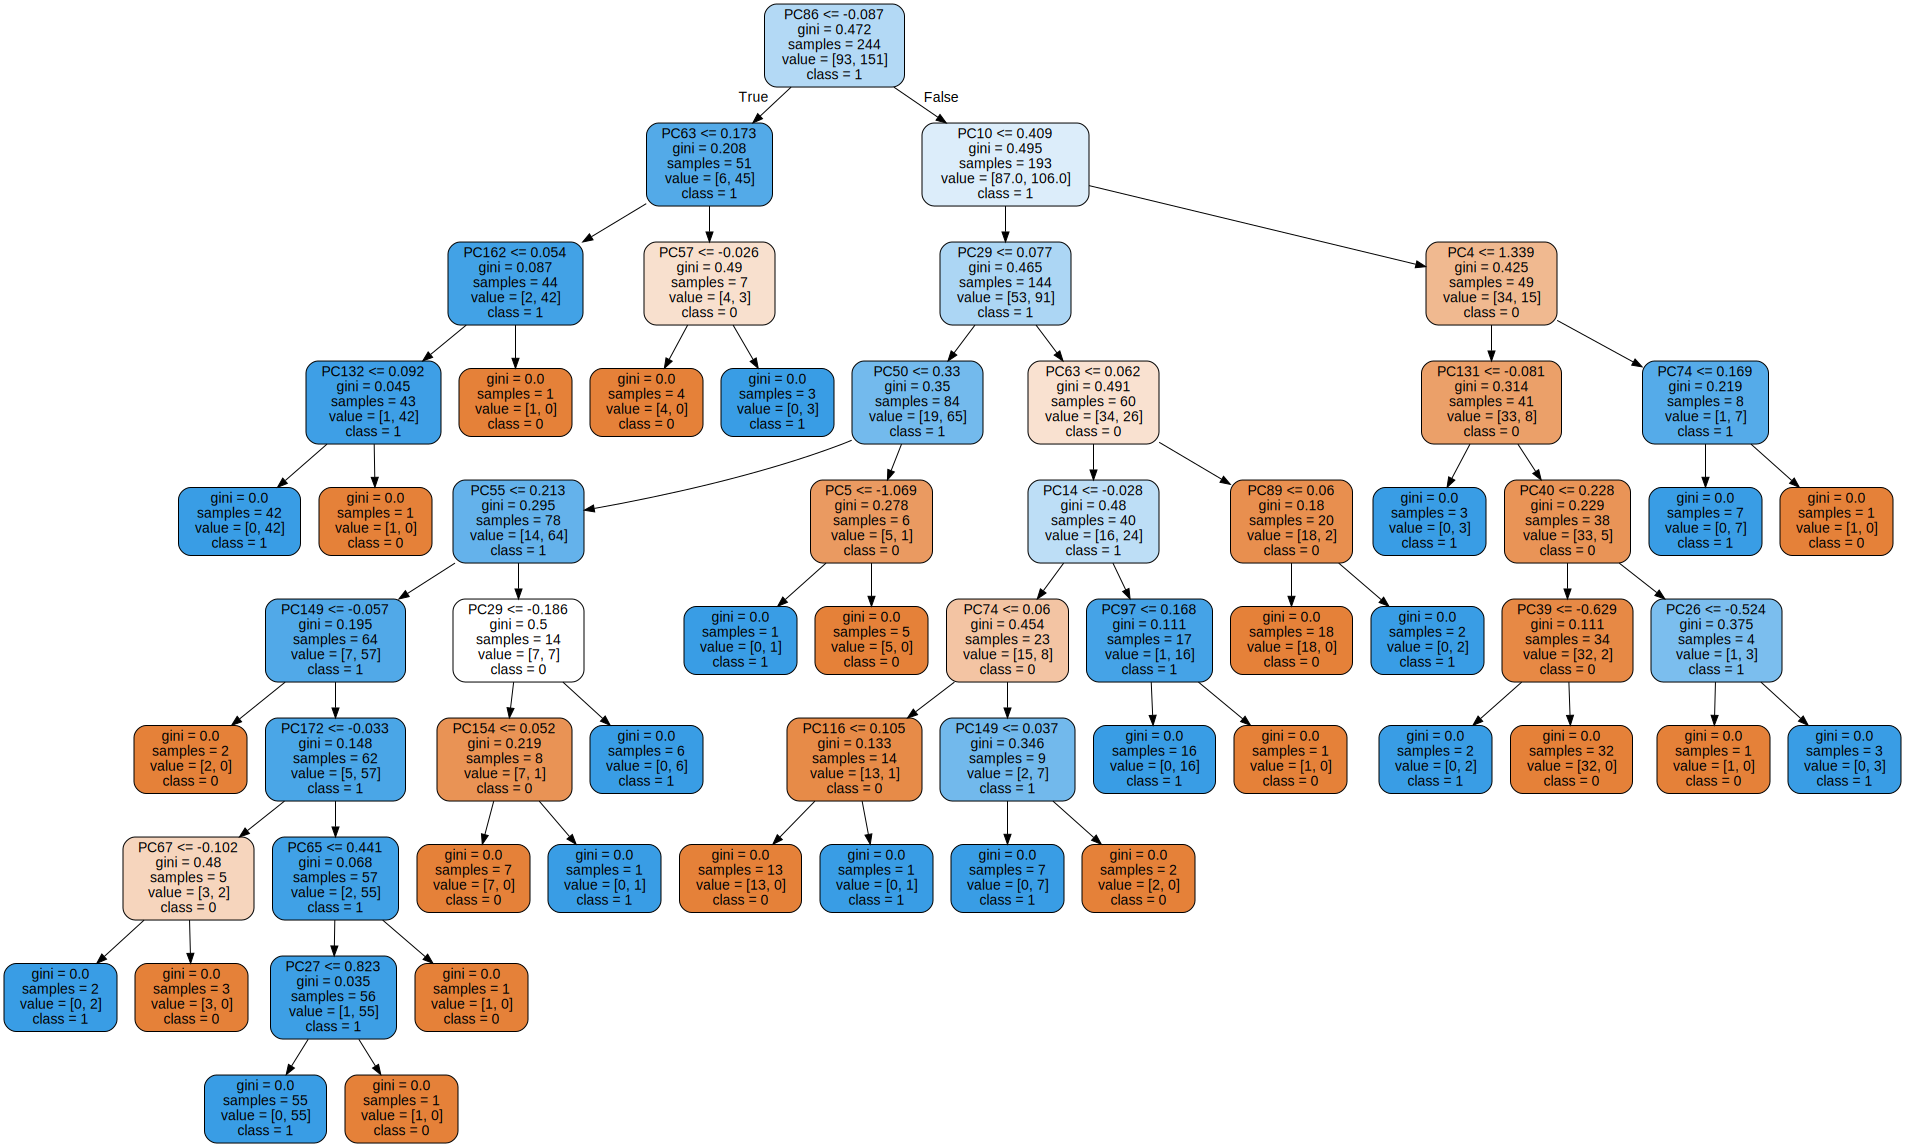

In [114]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="on_X_tree.dot", 
                feature_names=X_proj.columns,
                class_names=['0','1'], 
                rounded=True, filled=True)

# Import model graph
with open("on_X_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [115]:
# Make predictions
y_pred_treeX_proj = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_treeX_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_treeX_proj))

Accuracy: 0.6451612903225806

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        29
           1       0.62      0.88      0.72        33

    accuracy                           0.65        62
   macro avg       0.68      0.63      0.61        62
weighted avg       0.67      0.65      0.62        62



#### Decision Tree Classifier on X_proj25 (25 PCs) with train test split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_proj25, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

# Train the classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

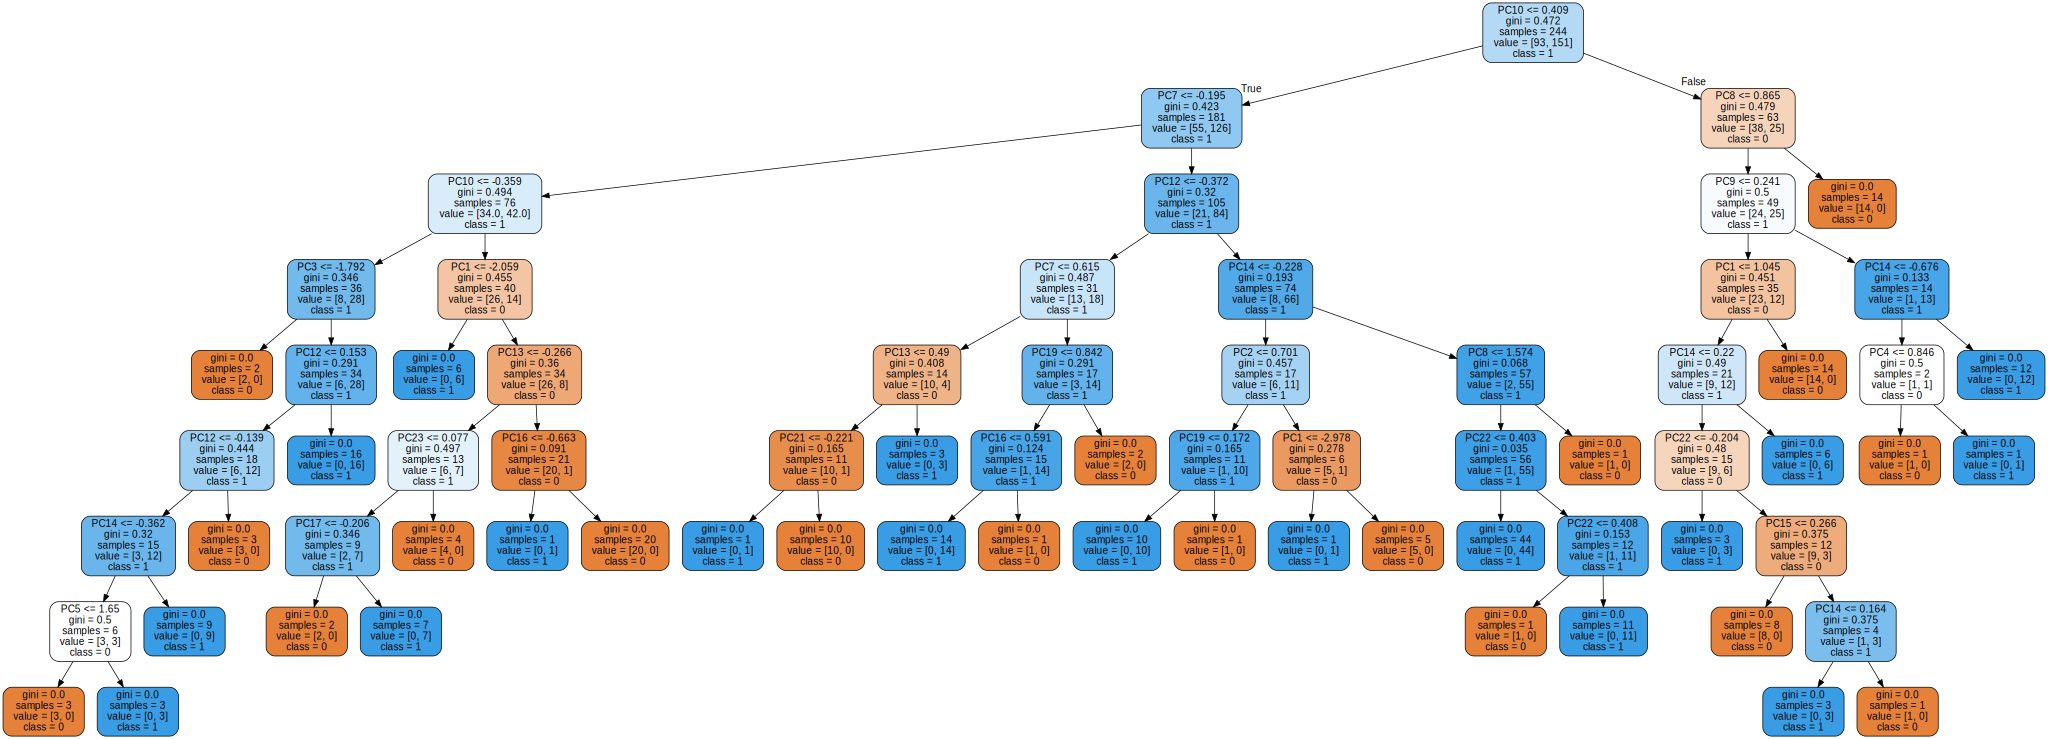

In [117]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="on_X_tree.dot", 
                feature_names=X_proj25.columns,
                class_names=['0','1'], 
                rounded=True, filled=True)

# Import model graph
with open("on_X_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [118]:
# Make predictions
y_pred_treeX_proj25 = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_treeX_proj25)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_treeX_proj25))

Accuracy: 0.5967741935483871

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        29
           1       0.61      0.70      0.65        33

    accuracy                           0.60        62
   macro avg       0.59      0.59      0.59        62
weighted avg       0.60      0.60      0.59        62



#### Random Forest on X

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
forest_clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
# Make predictions
y_pred_forestX = forest_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_forestX)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forestX))

Accuracy: 0.7580645161290323

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.71      0.91      0.80        33

    accuracy                           0.76        62
   macro avg       0.78      0.75      0.75        62
weighted avg       0.78      0.76      0.75        62



In [122]:
### AdaBoostingClassifier on X --- Random Forest

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
adaboost_clf = AdaBoostClassifier(estimator=forest_clf, n_estimators=50)

In [125]:
adaboost_clf.fit(X_train, y_train)

/home/giovals/.pyenv/versions/3.10.6/envs/brain_proteomics/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [126]:
y_pred_ada_X = adaboost_clf.predict(X_test)

In [127]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada_X))

Accuracy: 0.7258064516129032

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.68      0.91      0.78        33

    accuracy                           0.73        62
   macro avg       0.76      0.71      0.71        62
weighted avg       0.75      0.73      0.71        62



In [128]:
### GradientBoostingClassifier on X --- Random Forest

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
gradboost_clf = GradientBoostingClassifier(loss='log_loss', n_estimators=100)

In [132]:
gradboost_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [133]:
y_pred_grad_X = gradboost_clf.predict(X_test)

In [134]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_grad_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grad_X))

Accuracy: 0.7419354838709677

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        29
           1       0.71      0.88      0.78        33

    accuracy                           0.74        62
   macro avg       0.76      0.73      0.73        62
weighted avg       0.76      0.74      0.74        62



#### Random Forest on X_proj

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
forest_clf = RandomForestClassifier()

# Train the classifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
# Make predictions
y_pred_forestX_proj = forest_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_forestX_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forestX_proj))

Accuracy: 0.5645161290322581

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        29
           1       0.55      1.00      0.71        33

    accuracy                           0.56        62
   macro avg       0.78      0.53      0.42        62
weighted avg       0.76      0.56      0.44        62



In [138]:
### AdaBoostingClassifier on X_proj --- Random Forest

In [139]:
adaboost_clf = AdaBoostClassifier(estimator=forest_clf, n_estimators=50)

In [140]:
adaboost_clf.fit(X_train, y_train)

/home/giovals/.pyenv/versions/3.10.6/envs/brain_proteomics/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [141]:
# Make predictions
y_pred_ada_X_proj = adaboost_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada_X_proj))

Accuracy: 0.5483870967741935

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.07      0.12        29
           1       0.54      0.97      0.70        33

    accuracy                           0.55        62
   macro avg       0.60      0.52      0.41        62
weighted avg       0.60      0.55      0.43        62



In [ ]:
### GradientBoostingClassifier on X_proj --- Random Forest

In [142]:
gradboost_clf = GradientBoostingClassifier(loss='log_loss', n_estimators=100)

In [143]:
gradboost_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [144]:
y_pred_grad_X_proj = gradboost_clf.predict(X_test)

In [145]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_grad_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grad_X_proj))

Accuracy: 0.6451612903225806

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        29
           1       0.62      0.85      0.72        33

    accuracy                           0.65        62
   macro avg       0.66      0.63      0.62        62
weighted avg       0.66      0.65      0.63        62



#### Random Forest on X_proj25

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_proj25, y, test_size=0.2)

# Initialize the Decision Tree Classifier
forest_clf = RandomForestClassifier()

# Train the classifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
# Make predictions
y_pred_forestX_proj25 = forest_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_forestX_proj25)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forestX_proj25))

Accuracy: 0.6451612903225806

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        31
           1       0.60      0.87      0.71        31

    accuracy                           0.65        62
   macro avg       0.68      0.65      0.63        62
weighted avg       0.68      0.65      0.63        62



In [148]:
### AdaBoostingClassifier on X_proj25 --- Random Forest

In [150]:
adaboost_clf = AdaBoostClassifier(estimator=forest_clf, n_estimators=50)

In [151]:
adaboost_clf.fit(X_train, y_train)

/home/giovals/.pyenv/versions/3.10.6/envs/brain_proteomics/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [152]:
# Make predictions
y_pred_ada_X_proj25 = adaboost_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada_X_proj25)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada_X_proj25))

Accuracy: 0.6935483870967742

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        31
           1       0.64      0.90      0.75        31

    accuracy                           0.69        62
   macro avg       0.73      0.69      0.68        62
weighted avg       0.73      0.69      0.68        62



In [153]:
### GradientBoostingClassifier on X_proj --- Random Forest

In [154]:
gradboost_clf = GradientBoostingClassifier(loss='log_loss', n_estimators=100)

In [155]:
gradboost_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [156]:
y_pred_grad_X_proj25 = gradboost_clf.predict(X_test)

In [157]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_grad_X_proj25)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grad_X_proj25))

Accuracy: 0.7096774193548387

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.68      0.81      0.74        31

    accuracy                           0.71        62
   macro avg       0.72      0.71      0.71        62
weighted avg       0.72      0.71      0.71        62



### Support Vector Classifier

In [158]:
from sklearn.svm import SVC

#### SVC on X

In [161]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate
svc = SVC(kernel='linear', C=1)

# Train the classifier
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [162]:
# Make predictions
y_pred_svc_X = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_X))

Accuracy: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.81        33

    accuracy                           0.77        62
   macro avg       0.78      0.77      0.77        62
weighted avg       0.78      0.77      0.77        62



#### SVC on X_proj

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear', C=1)


# Train the classifier
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [164]:
# Make predictions
y_pred_svc_X_proj = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_X_proj))

Accuracy: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.81        33

    accuracy                           0.77        62
   macro avg       0.78      0.77      0.77        62
weighted avg       0.78      0.77      0.77        62



In [165]:
#### SVC on X_proj25

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_proj25, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear', C=1)

# Train the classifier
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [167]:
# Make predictions
y_pred_svc_X_proj25 = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc_X_proj25)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_X_proj25))

Accuracy: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.81        33

    accuracy                           0.77        62
   macro avg       0.78      0.77      0.77        62
weighted avg       0.78      0.77      0.77        62



### GridSearchCV on SVC

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier
svc = SVC()

# Define the grid of parameters to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

In [171]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [172]:
predictions = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7903225806451613

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.82        33

    accuracy                           0.79        62
   macro avg       0.80      0.78      0.79        62
weighted avg       0.80      0.79      0.79        62



In [ ]:
# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)